In [1]:
# Directory of fruits
from modFruitImages import train_dir, test_dir
print("train directory: " + train_dir)
print("test directory: " + test_dir)

train directory: C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\train\
test directory: C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\


In [2]:
# list the images files
from modFruitImages import listImages
listImages(test_dir)

C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_224 (2).jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_328.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_330.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_332.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_333.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_334.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_335.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_336.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_337.jpg
C:\Users\user\JupyterNotebook\projFruitImagesClassification\inputimages\test\apple\image_338.jpg
C:\Users\user\JupyterNoteb

In [ ]:
import pandas as pd
df = pd.DataFrame()
df

In [8]:
# list the images files in dataframe 
from modFruitImages import fillTheLists, fillTheDataFrame, dfTrainFruit
fillTheLists()
fillTheDataFrame()
dfTrainFruit.tail(5)

,Fruits,Fruits Image
1495,strawberry,strawberry/image_456.jpg
1496,strawberry,strawberry/image_457.jpg
1497,strawberry,strawberry/image_458.jpg
1498,strawberry,strawberry/image_459.jpg
1499,strawberry,strawberry/image_466.jpg


Found fruits in the data set and their corresponding count of image(s)
[('apple', 300), ('banana', 300), ('mango', 300), ('orange', 300), ('strawberry', 300)]
Found fruits:  ['apple', 'banana', 'mango', 'orange', 'strawberry']
Number of Images:  [300, 300, 300, 300, 300]


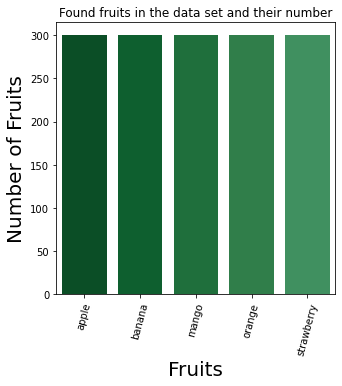

How many different fruits:  5


In [12]:
from modFruitImages import countForEach, listForFruit, plotForFruit, howmanyType
countForEach()
listForFruit()
plotForFruit()
howmanyType()

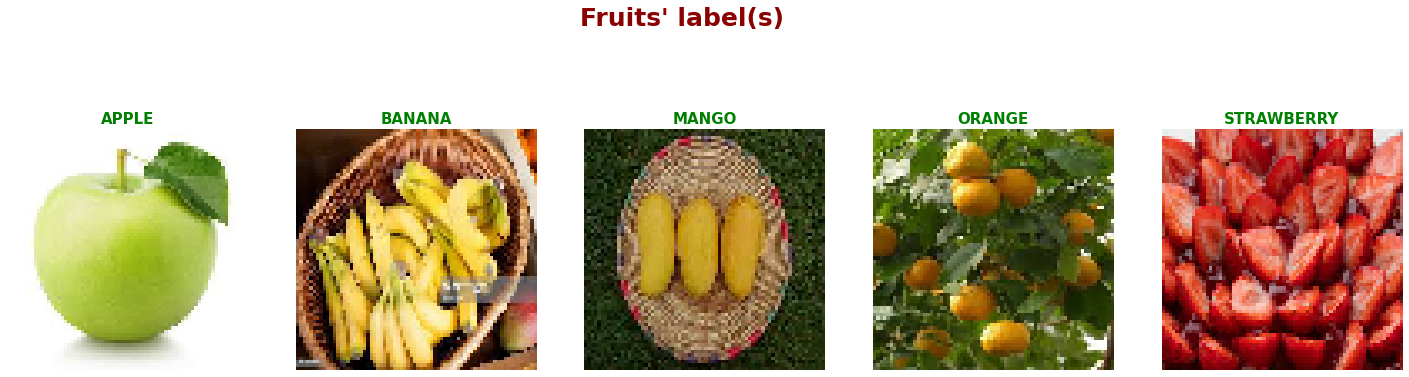

In [10]:
from modFruitImages import plotOneForEach
plotOneForEach()

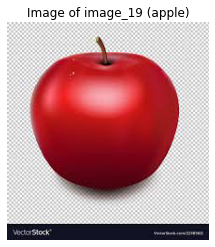

Image Shape:  (233, 216, 3)


In [11]:

from modFruitImages import plotOneImage, getImageShape
plotOneImage("apple", "image_19")
getImageShape()

In [7]:
# import model 
import tensorflow as tf 
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense

from modFruitImages import numberOfClass

#import warnings
import warnings
warnings.filterwarnings('ignore')
model = Sequential()
# convolution layer (1 st)
model.add(Conv2D(
    filters=32,
    kernel_size = (3, 3),
    input_shape = (72, 72, 3),
    activation = 'relu'))
# pooling layer (1st)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer (1st)
model.add(Dropout(0.1))

# convolution layer (2nd)
model.add(Conv2D(
    filters=64, 
    kernel_size = (3, 3),
    activation = 'relu'))
# pooling layer (2nd)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer (2nd )
model.add(Dropout(0.2))

# convolution layer (3rd)
model.add(Conv2D(
    filters=64,
    kernel_size = (3, 3),
    activation = 'relu'))
# pooling layer (3rd)
model.add(MaxPooling2D(pool_size=(2,2)))
# dropout layer (3rd )
model.add(Dropout(0.3))
# flatten layer
model.add(Flatten())
# Dense layer
model.add(Dense(
    units=512, 
    activation='relu'))
# dropout layer
# model.add(Dropout(0.2))
# output layer
model.add(Dense(
    units=numberOfClass, 
    activation='softmax')) 

In [ ]:
model.summary()

In [ ]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"])

In [ ]:

# number of training
epochs = 100  
# get 32 images per training
batch_size = 32

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale= 1./255, # normalize from 0~255 to 0~1
    shear_range = 0.3,
    horizontal_flip=True,
    zoom_range = 0.3,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (72, 72),
    batch_size = batch_size,
    color_mode= "rgb",
    class_mode= "categorical")


In [ ]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (72, 72),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")


In [ ]:
# get the shape from train_generator
for data_batch, labels_batch in train_generator:
    print("data_batch (train) shape: ", data_batch.shape)
    print("labels_batch (train) shape: ", labels_batch.shape)
    break
# get the shape from test_generator
for data_batch, labels_batch in test_generator:
    print("data_batch (test) shape: ", data_batch.shape)
    print("labels_batch (test) shape: ", labels_batch.shape)
    break

In [ ]:
# try to reveal what the train_datagen containing images are

%matplotlib inline
import os
import matplotlib.pyplot as plt3
from tensorflow.keras.preprocessing import image

thispath = train_dir + "\\apple"
fnames = [os.path.join(thispath, fname) for
    fname in os.listdir(thispath)]
img_path = fnames[3]

# print(img_path)

img = image.load_img(img_path, target_size=(72, 72))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# print(x)

# set the spacing between subplots
plt3.figure(figsize=(20, 20))
i=0
for batch in train_datagen.flow(x, batch_size=1):
    ax = plt3.subplot(2, 5, i+1)
    plt3.imshow(image.array_to_img(batch[0]))
    plt3.title(i)
    plt3.axis("off")
    i += 1
    if i % 10 == 0:
        break
plt3.show()

In [ ]:

hist = model.fit_generator(
        generator = train_generator,
        steps_per_epoch = (train_generator.samples) // batch_size,
        epochs=epochs,
        validation_data = test_generator,
        validation_steps = (test_generator.samples) // batch_size)
model.save('model.h5')

In [ ]:
hist.history.keys()

In [ ]:
import matplotlib.pyplot as plt1
plt1.figure(figsize=(12, 8))
plt1.plot(hist.history["loss"], label = "Train Loss", color = "black")
plt1.plot(hist.history["val_loss"], label = "Validation Loss", color = "darkred", 
         linestyle="dashed", markeredgecolor = "purple", markeredgewidth = 2)
plt1.title("Model Loss", color = "darkred", size = 13)
plt1.legend()
plt1.show()

In [ ]:
import matplotlib.pyplot as plt2
plt2.figure(figsize=(12, 8))
plt2.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")
plt2.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "darkred", 
         linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)
plt2.title("Model Accuracy", color = "darkred", size = 13)
plt2.legend()
plt2.show()